In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
# Model configuration
max_sequence_length = 64
num_distinct_words = 20000
embedding_output_dims = 15
loss_function = 'binary_crossentropy'
optimizer = 'adam'
additional_metrics = ['accuracy']
number_of_epochs = 100
verbosity_mode = True
validation_split = 0.20


In [4]:
# Load dataset
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

x_train = np.asarray(data[10000:])
x_test = np.asarray(data[:10000])
y_train = np.asarray(targets[10000:])
y_test = np.asarray(targets[:10000])

print(x_train.shape)
print(x_test.shape)

print(x_train.shape)
print(x_test.shape)

# (training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=20000)
# data = np.concatenate((training_data, testing_data), axis=0)
# targets = np.concatenate((training_targets, testing_targets), axis=0)

(40000,)
(10000,)
(40000,)
(10000,)


In [5]:

# Pad all sequences
padded_inputs = pad_sequences(x_train, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>
padded_inputs_test = pad_sequences(x_test, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>


In [6]:


# Here, you'd normally test first that the model generalizes and concatenate all data
# (that is, normally, you'd perform e.g. K-fold Cross Validation first)
# Then, you can use all data for a full training run. Now, we'll use x_train for training only.

# Obtain 3 texts
for i in np.random.randint(0, len(padded_inputs), 3):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(padded_inputs[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in padded_inputs[i] ))


Sample = 5326 | Length = 64
for him to its credit there are some rare numbers before tommy as well as some <UNK> that are very well shot and sometimes the editing is brilliant this might be enough to make some viewers happy as long as you're not <UNK> tommy the sound overall was mediocre in the <UNK> i watched from <UNK> it may be different on video or dvd
Sample = 32868 | Length = 64
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <UNK> looks like it's gonna cost you a <UNK> 00 to buy a copy either dvd or video format from <UNK> direct br br <UNK> br br sorry about this but imdb won't let me submit this comment unless it has at least 10 lines so br br br br
Sample = 20226 | Length = 64
dialogue the manipulative soundtrack the corny narration all of it as each scene <UNK> i kept thinking people don't act like this it's relentlessly heavy handed and <UNK> in a way i think the movie bullies you into liking it or pretending to like it because it's ser

In [7]:


# Define the Keras model
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(Dropout(0.50))
model.add(Conv1D(filters=128, kernel_size=64, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(Conv1D(filters=128, kernel_size=64, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
# model.add(Dropout(0.50))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

# Give a summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 64, 15)            300000    
_________________________________________________________________
dropout (Dropout)            (None, 64, 15)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 128)           123008    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64, 128)           1048704   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 128)           0

In [8]:

# Train the model
history = model.fit(padded_inputs, y_train, epochs=10, verbose=verbosity_mode, validation_split=validation_split)



Epoch 1/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.4748 - accuracy: 0.7526 - val_loss: 0.4348 - val_accuracy: 0.8292
Epoch 2/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.3369 - accuracy: 0.8519 - val_loss: 0.3716 - val_accuracy: 0.8499
Epoch 3/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.2994 - accuracy: 0.8695 - val_loss: 0.3663 - val_accuracy: 0.8468
Epoch 4/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.2670 - accuracy: 0.8876 - val_loss: 0.3502 - val_accuracy: 0.8472
Epoch 5/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.2422 - accuracy: 0.8981 - val_loss: 0.3531 - val_accuracy: 0.8485
Epoch 6/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.2256 - accuracy: 0.9051 - val_loss: 0.3480 - val_accuracy: 0.8485
Epoch 7/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.2089 - accuracy: 0.9120 - val_loss: 0.3504 -

In [11]:
# Test the model after training
test_results = model.evaluate(padded_inputs_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')


Test results - Loss: 0.38310301303863525 - Accuracy: 82.99000263214111%


In [23]:
print(y_test.view(-1,1).shape)
print(y_pred.shape)

ValueError: Type must be a sub-type of ndarray type

In [25]:
y_pred = model.predict(padded_inputs_test)
confusion_matrix = confusion_matrix(np.asarray(np.asarray(y_test).view(-1,1)), np.asarray(y_pred))

ValueError: Type must be a sub-type of ndarray type

In [16]:
from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(test_y,preds)
# plot_confusion_matrix(cm,target_names = None,title='Confusion matrix for Logistic regression',
#                           cmap=None,
#                           normalize=False)

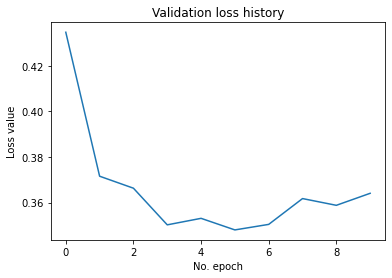

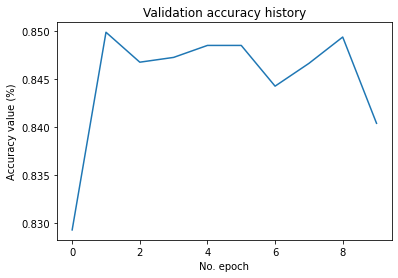

In [12]:

# Visualize history
# Plot history: Validation loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()